# **Building a Deep Neural Network Regression Model using TensorFlow**

### **Importing All Necessary Libraries**

In [14]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

### **Load the Dataset**

In [15]:
df = pd.read_csv('Life_expectancy_dataset.csv', encoding='ISO-8859-1')
df.head()

,Rank,Country,Overall Life,Male Life,Female Life,Continent
0,1,Monaco,89.5,85.6,93.5,Europe
1,2,Japan,85.0,81.7,88.5,Asia
2,3,Singapore,85.0,82.3,87.8,Asia
3,4,Macau; China,84.5,81.6,87.6,Asia
4,5,San Marino,83.3,80.7,86.1,Europe


### **Selecting the feature and target variable**

X: Feature (Male Life expectancy), 
y: Target (Overall Life expectancy)

In [16]:
X = df[['Male Life']].values
y = df['Overall Life'].values

### **Splitting the Dataset**

Split the data into training (80%) and testing (20%) sets.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Standardizing the Data**

Standardize the feature data to have a mean of 0 and variance of 1.

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **Defining the Model**

since simple Sequential model with one Dense layer containing 1 unit gave more loss so added more Layers. The model now has three hidden layers with 64, 32, and 16 units respectively.

Each hidden layer uses the ReLU (Rectified Linear Unit) activation function to introduce non-linearity.
The output layer remains a single unit with no activation function, suitable for regression tasks.

In [19]:
# Define the model
# A simple Sequential model with one Dense layer
"""model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])  # Dense layer with 1 unit and input shape of 1
])"""

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=[1]),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

### **Compiling the Model**

Compiling the model using the Adam optimizer, mean squared error loss function, and mean absolute error as an additional metric.

In [20]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

### **Training the Model**

Train the model on the training data for 100 epochs.
Use 20% of the training data for validation.

In [21]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
5/5 [==============================] - 1s 37ms/step - loss: 5380.9316 - mean_absolute_error: 72.8611 - val_loss: 5197.1895 - val_mean_absolute_error: 71.5402
Epoch 2/100
5/5 [==============================] - 0s 9ms/step - loss: 5366.2256 - mean_absolute_error: 72.7597 - val_loss: 5183.0610 - val_mean_absolute_error: 71.4419
Epoch 3/100
5/5 [==============================] - 0s 8ms/step - loss: 5351.6406 - mean_absolute_error: 72.6615 - val_loss: 5169.4556 - val_mean_absolute_error: 71.3464
Epoch 4/100
5/5 [==============================] - 0s 8ms/step - loss: 5337.6885 - mean_absolute_error: 72.5656 - val_loss: 5154.9111 - val_mean_absolute_error: 71.2437
Epoch 5/100
5/5 [==============================] - 0s 9ms/step - loss: 5321.4507 - mean_absolute_error: 72.4543 - val_loss: 5138.1011 - val_mean_absolute_error: 71.1234
Epoch 6/100
5/5 [==============================] - 0s 8ms/step - loss: 5302.9067 - mean_absolute_error: 72.3245 - val_loss: 5117.1880 - val_mean_absolute_

### **Evaluating the Model**

Evaluate the model on the test data and print the loss and mean absolute error.

In [22]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test MAE: {test_mae}')

2/2 [==============================] - 0s 4ms/step - loss: 16.7437 - mean_absolute_error: 3.0825
Test Loss: 16.743663787841797, Test MAE: 3.0825443267822266


### **Making Predictions**

Make predictions on the test data and print the predicted values.

In [23]:
predictions = model.predict(X_test)
print(predictions)

2/2 [==============================] - 0s 2ms/step
[[84.829575]
 [76.77142 ]
 [72.376076]
 [70.74195 ]
 [65.545044]
 [73.98769 ]
 [75.745834]
 [75.15979 ]
 [59.365555]
 [58.8789  ]
 [78.96909 ]
 [85.30324 ]
 [59.677135]
 [83.80398 ]
 [81.89934 ]
 [80.58073 ]
 [60.06805 ]
 [75.745834]
 [62.3702  ]
 [75.15979 ]
 [74.72026 ]
 [84.536545]
 [75.745834]
 [69.48435 ]
 [65.06983 ]
 [70.291695]
 [59.460003]
 [79.555145]
 [78.96909 ]
 [74.1342  ]
 [60.874256]
 [77.35747 ]
 [83.80398 ]
 [58.934753]
 [68.747894]
 [72.376076]
 [63.78812 ]
 [69.48435 ]
 [75.45281 ]
 [58.8715  ]
 [65.43604 ]
 [61.15665 ]
 [58.86086 ]
 [70.14161 ]
 [62.689518]]


### **Plotting the Results**

Plot the training and validation loss as well as the mean absolute error over the epochs.

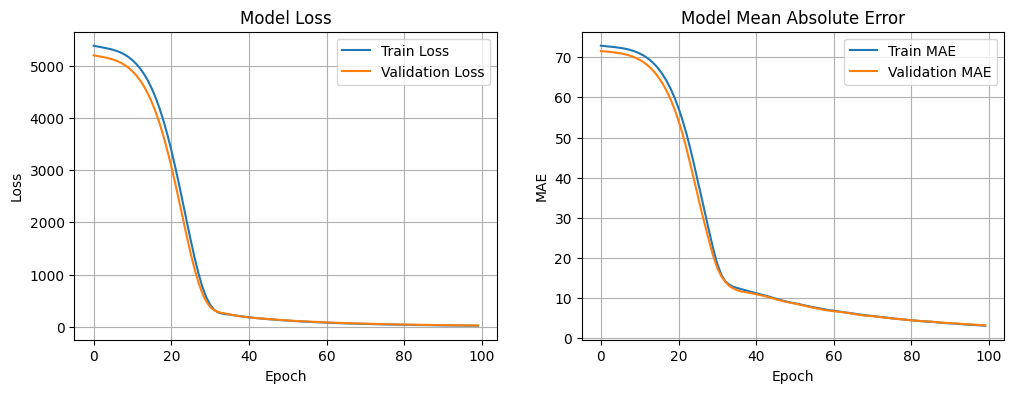

In [24]:
# Plotting training & validation loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid()

# Plotting training & validation mean absolute error values
plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'], label='Train MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Model Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend(loc='upper right')
plt.grid()
plt.show()